In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

---
#New York CitiBikes 
#The Prediction of Speed and the Influence of Terrain and Weather
##Acknowledgements
##  1 Citibike operated by NYC Bike Share
##  2 MapQuest Open Platform Web Services
##  3 Weather Underground
---

---
##Why did I choose to do a project on CitiBikes?
### * Freely available dataset
### * Large, relatively complete dataset
### * High quality dataset
### * Has many variables
### * Timeseries data, so that expands the possibilities
### * Lots of projects have used this data, so lots of idea around
---
##The dataset drove my choice of project. 
##In short I chose this dataset because of its qualities
##Then I figured out some kind of slightly unique way of analyzing it

---
##Here is just one months data
---

In [2]:
data = pd.read_csv("/Users/mrgholt/GADS-22-NYC/Citibike_Data/raw/2014-01 - Citi Bike trip data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300400 entries, 0 to 300399
Data columns (total 15 columns):
tripduration               300400 non-null int64
starttime                  300400 non-null object
stoptime                   300400 non-null object
start station id           300400 non-null int64
start station name         300400 non-null object
start station latitude     300400 non-null float64
start station longitude    300400 non-null float64
end station id             300400 non-null int64
end station name           300400 non-null object
end station latitude       300400 non-null float64
end station longitude      300400 non-null float64
bikeid                     300400 non-null int64
usertype                   300400 non-null object
birth year                 300400 non-null object
gender                     300400 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 36.7+ MB


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300400 entries, 0 to 300399
Data columns (total 15 columns):
tripduration               300400 non-null int64
starttime                  300400 non-null object
stoptime                   300400 non-null object
start station id           300400 non-null int64
start station name         300400 non-null object
start station latitude     300400 non-null float64
start station longitude    300400 non-null float64
end station id             300400 non-null int64
end station name           300400 non-null object
end station latitude       300400 non-null float64
end station longitude      300400 non-null float64
bikeid                     300400 non-null int64
usertype                   300400 non-null object
birth year                 300400 non-null object
gender                     300400 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 36.7+ MB


---
##A big clean dataset
---

In [5]:
print data.head(4)

   tripduration            starttime             stoptime  start station id  \
0           471  2014-01-01 00:00:06  2014-01-01 00:07:57              2009   
1          1494  2014-01-01 00:00:38  2014-01-01 00:25:32               536   
2           464  2014-01-01 00:03:59  2014-01-01 00:11:43               228   
3           373  2014-01-01 00:05:15  2014-01-01 00:11:28               519   

         start station name  start station latitude  start station longitude  \
0  Catherine St & Monroe St               40.711174               -73.996826   
1           1 Ave & E 30 St               40.741444               -73.975361   
2           E 48 St & 3 Ave               40.754601               -73.971879   
3         Pershing Square N               40.751884               -73.977702   

   end station id          end station name  end station latitude  \
0             263  Elizabeth St & Hester St             40.717290   
1             259   South St & Whitehall St             40.701221

In [6]:
for i in xrange(len(data.columns)):
    print data.columns[i], type(data.columns[i])

tripduration <type 'str'>
starttime <type 'str'>
stoptime <type 'str'>
start station id <type 'str'>
start station name <type 'str'>
start station latitude <type 'str'>
start station longitude <type 'str'>
end station id <type 'str'>
end station name <type 'str'>
end station latitude <type 'str'>
end station longitude <type 'str'>
bikeid <type 'str'>
usertype <type 'str'>
birth year <type 'str'>
gender <type 'str'>


---
#Initial Ideas
---
## * Initially wanted to try and deduce a map from the trips
## * I was drawn to the idea of producing 'fancy' graphics
## * Somehow use the latitude and longitude information and draw some kind of map and hoped it looked like NYC
## * While the idea of producing cool, fancy maps is very appealing, I dismissed this as too difficult given the time constraints to finish the project
---

---
#The Big Idea!!!
---
##Looking at the data I noticed there was no information concerning speed
##How fast do these bikes go, especially round NYC??
##There was no specific route information, so how could I estimate speed???
---
#Consider...
##To get some estimate of speed we would need to have some idea of the route and therefore the distance
##Hmmmm...
##On investigation it turns out the MapQuest have a public api available that will return a 'bike route' between and given pair of longitude/latitude coordinates!
##http://www.mapquestapi.com/

---
#Further thoughts
##It doesn't matter that this isn't the exact route, as we are just trying to estimate some kind of speed
##MapQuest will return a consistent route between any 2 give CitiBike stations, given their respective longitudes and latitudes
##So the trick will be find a subset of riders who have the following characteristics:
## * All of the same gender - to eliminate speed variances due to gender
## * Are Citibike subscribers, and not 'guests' - to eliminate the casual rider
## * Are business hours riders only - to try and get the regular, daily rider, who might ride hard, and fast and use a consistent route
## * Ride fast between any two given stations. Such riders might go for speed and therefore may never change their route, once they have found a good one.
## * Ride well used routes between stations - meaning there are a lot of trips taken between the pair of stations
---
##So I wanted the subset of Citibike riders that were daily or regular users, who got on and cycled with a purpose between 2 stations
##If I could get such a subset of riders and then assume a constant route maybe then I could estimate their speed
---

---
#1. Exploratory Data Analysis and Munging
---

---
##Get proper dates and times into the starttime and stoptime columns
---

In [7]:
print data.starttime[0]
type(data.starttime[0])

2014-01-01 00:00:06


str

---
##These columns were coverted using the pandas built in to_datetime function
---

In [8]:
data.starttime = pd.to_datetime(data.starttime)
data.stoptime = pd.to_datetime(data.stoptime)

In [9]:
data.starttime[0]
type(data.starttime[0])

pandas.tslib.Timestamp

---
##Next subset the data based on gender
---

In [10]:
data.gender.head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

---
##Filter to use only the data for men
##Men took the bulk of all the trips taken
---

In [11]:
dfMale = data[data.gender==1].copy()

In [12]:
dfMale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236106 entries, 0 to 300399
Data columns (total 15 columns):
tripduration               236106 non-null int64
starttime                  236106 non-null datetime64[ns]
stoptime                   236106 non-null datetime64[ns]
start station id           236106 non-null int64
start station name         236106 non-null object
start station latitude     236106 non-null float64
start station longitude    236106 non-null float64
end station id             236106 non-null int64
end station name           236106 non-null object
end station latitude       236106 non-null float64
end station longitude      236106 non-null float64
bikeid                     236106 non-null int64
usertype                   236106 non-null object
birth year                 236106 non-null object
gender                     236106 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(5), object(4)
memory usage: 28.8+ MB


---
##Filter to use only Citibike subscribers
---

In [13]:
data.usertype.head()

0    Subscriber
1    Subscriber
2    Subscriber
3    Subscriber
4    Subscriber
Name: usertype, dtype: object

In [14]:
dfMaleSubscriber = dfMale[dfMale.usertype=='Subscriber'].copy()

---
##Just check that 'Subscriber' is consistently used (and not 'subscriber', or 'subscription', etc)
---

In [15]:
len(['subscriber' in s.lower() for s in dfMaleSubscriber.usertype])

236106

---
##Now that I have legitimate date and times in the starttime and endtime columns I can think about subsetting the data even more
##Only use data from Mon to Fri
##Confirmed that 1 Jan 2014 was a wed, and 3rd was a Fri
---

In [16]:
print dfMaleSubscriber.starttime[0]
print dfMaleSubscriber.starttime[0].dayofweek
print dfMaleSubscriber.starttime[15504]
print dfMaleSubscriber.starttime[15504].dayofweek

2014-01-01 00:00:06
2
2014-01-03 18:18:43
4


In [17]:
dfMaleSubscriber = dfMaleSubscriber.reset_index()

In [18]:
print len(dfMaleSubscriber.starttime)

236106


In [19]:
#This cell takes a few minutes to run!!

dayofweeklist = []
for i in xrange(len(dfMaleSubscriber.starttime)):
    if i % 50000 == 0:
        print '.',
    st = dfMaleSubscriber.loc[i].starttime.dayofweek
    if st == 0:
        dayofweeklist.append('mon')
    elif st == 1:
        dayofweeklist.append('tue')
    elif st == 2:
        dayofweeklist.append('wed')
    elif st == 3:
        dayofweeklist.append('thu')
    elif st == 4:
        dayofweeklist.append('fri')
    elif st == 5:
        dayofweeklist.append('sat')
    elif st == 6:
        dayofweeklist.append('sun')
    else:
        dayofweeklist.append('unk')
        print "shouldn't be here"

. . . . .


In [20]:
dfMaleSubscriber['dayofweek'] = dayofweeklist

In [21]:
dfMaleSubscriber.dayofweek[0:5]

0    wed
1    wed
2    wed
3    wed
4    wed
Name: dayofweek, dtype: object

In [22]:
dfMaleSubscriber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236106 entries, 0 to 236105
Data columns (total 17 columns):
index                      236106 non-null int64
tripduration               236106 non-null int64
starttime                  236106 non-null datetime64[ns]
stoptime                   236106 non-null datetime64[ns]
start station id           236106 non-null int64
start station name         236106 non-null object
start station latitude     236106 non-null float64
start station longitude    236106 non-null float64
end station id             236106 non-null int64
end station name           236106 non-null object
end station latitude       236106 non-null float64
end station longitude      236106 non-null float64
bikeid                     236106 non-null int64
usertype                   236106 non-null object
birth year                 236106 non-null object
gender                     236106 non-null int64
dayofweek                  236106 non-null object
dtypes: datetime64[ns](2)

In [23]:
dfMaleSubscriberWeekday = dfMaleSubscriber[(dfMaleSubscriber['dayofweek'] == 'mon') | \
                                          (dfMaleSubscriber['dayofweek'] == 'tue') |\
                                          (dfMaleSubscriber['dayofweek'] == 'wed') |\
                                          (dfMaleSubscriber['dayofweek'] == 'thu') |\
                                          (dfMaleSubscriber['dayofweek'] == 'fri')].copy()

In [24]:
dfMaleSubscriberWeekday[dfMaleSubscriberWeekday.dayofweek == 'sun'].count()

index                      0
tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dayofweek                  0
dtype: int64

---
##I also wanted to exclude other non-work days: meaning 2014 holidays
---

In [25]:
holiday_list = ["2014:01:01", "2014:01:20", "2014:02:17", "2014:05:26", \
                "2014:07:04", "2013:09:02", "2013:10:14", "2013:11:11", "2013:11:28", "2013:12:25"]

In [26]:
dfMaleSubscriberWeekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196767 entries, 0 to 236105
Data columns (total 17 columns):
index                      196767 non-null int64
tripduration               196767 non-null int64
starttime                  196767 non-null datetime64[ns]
stoptime                   196767 non-null datetime64[ns]
start station id           196767 non-null int64
start station name         196767 non-null object
start station latitude     196767 non-null float64
start station longitude    196767 non-null float64
end station id             196767 non-null int64
end station name           196767 non-null object
end station latitude       196767 non-null float64
end station longitude      196767 non-null float64
bikeid                     196767 non-null int64
usertype                   196767 non-null object
birth year                 196767 non-null object
gender                     196767 non-null int64
dayofweek                  196767 non-null object
dtypes: datetime64[ns](2)

In [27]:
dfMaleSubscriberWeekday['holidays'] = [(st.strftime('%Y:%m:%d') in holiday_list) for \
                                       st in dfMaleSubscriberWeekday.starttime]

In [28]:
dfMaleSubscriberWeekdayH = dfMaleSubscriberWeekday[dfMaleSubscriberWeekday.holidays==False].copy()

In [29]:
dfMaleSubscriberWeekdayH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182582 entries, 4217 to 236105
Data columns (total 18 columns):
index                      182582 non-null int64
tripduration               182582 non-null int64
starttime                  182582 non-null datetime64[ns]
stoptime                   182582 non-null datetime64[ns]
start station id           182582 non-null int64
start station name         182582 non-null object
start station latitude     182582 non-null float64
start station longitude    182582 non-null float64
end station id             182582 non-null int64
end station name           182582 non-null object
end station latitude       182582 non-null float64
end station longitude      182582 non-null float64
bikeid                     182582 non-null int64
usertype                   182582 non-null object
birth year                 182582 non-null object
gender                     182582 non-null int64
dayofweek                  182582 non-null object
holidays              

---
##And finally subset the data further by only using trips started in working hours: 9am to 4pm
---

In [30]:
dfMaleSubscriberWeekdayH['ninetofive'] = [((int(st.strftime('%H')) >= 9) & (int(st.strftime('%H')) <= 16)) for \
                                       st in dfMaleSubscriberWeekdayH.starttime]

In [31]:
dfMaleSubscriberWeekdayHH = dfMaleSubscriberWeekdayH[dfMaleSubscriberWeekdayH.ninetofive == True]

In [32]:
dfMaleSubscriberWeekdayHH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71616 entries, 5715 to 231747
Data columns (total 19 columns):
index                      71616 non-null int64
tripduration               71616 non-null int64
starttime                  71616 non-null datetime64[ns]
stoptime                   71616 non-null datetime64[ns]
start station id           71616 non-null int64
start station name         71616 non-null object
start station latitude     71616 non-null float64
start station longitude    71616 non-null float64
end station id             71616 non-null int64
end station name           71616 non-null object
end station latitude       71616 non-null float64
end station longitude      71616 non-null float64
bikeid                     71616 non-null int64
usertype                   71616 non-null object
birth year                 71616 non-null object
gender                     71616 non-null int64
dayofweek                  71616 non-null object
holidays                   71616 non-nul

In [33]:
print dfMaleSubscriberWeekdayHH.head(1)

      index  tripduration           starttime            stoptime  \
5715   7868           474 2014-01-02 09:00:14 2014-01-02 09:08:08   

      start station id          start station name  start station latitude  \
5715              3002  South End Ave & Liberty St               40.711512   

      start station longitude  end station id       end station name  \
5715               -74.015756             304  Broadway & Battery Pl   

      end station latitude  end station longitude  bikeid    usertype  \
5715             40.704633             -74.013617   20645  Subscriber   

     birth year  gender dayofweek holidays ninetofive  
5715       1982       1       thu    False       True  


---
#A consolidated function to do all that processing
---

In [34]:
def prepare_data(filename):
    data = pd.read_csv(filename)
    data = data.dropna()
    data.starttime = pd.to_datetime(data.starttime)
    data.stoptime = pd.to_datetime(data.stoptime)
    dfMale = data[data.gender==1].copy()
    dfMaleSubscriber = dfMale[dfMale.usertype=='Subscriber'].copy()
    dfMaleSubscriber['dayofweek'] = [(st.dayofweek in [0,1,2,3,4]) for st in dfMaleSubscriber.starttime]
    dfMaleSubscriberWeekday = dfMaleSubscriber[dfMaleSubscriber.dayofweek==True].copy()
    holiday_list = ["2014:01:01", "2014:01:20", "2014:02:17", \
                    "2014:05:26", "2014:07:04", "2013:09:02", "2013:10:14", "2013:11:11", "2013:11:28", "2013:12:25"]
    dfMaleSubscriberWeekday['holidays'] = [(st.strftime('%Y:%m:%d') in holiday_list) for \
                                       st in dfMaleSubscriberWeekday.starttime]
    dfMaleSubscriberWeekdayH = dfMaleSubscriberWeekday[dfMaleSubscriberWeekday.holidays==False].copy()
    dfMaleSubscriberWeekdayH['ninetofive'] = [((int(st.strftime('%H')) >= 9) & (int(st.strftime('%H')) <= 16)) for \
                                       st in dfMaleSubscriberWeekdayH.starttime]
    dfMaleSubscriberWeekdayHH = dfMaleSubscriberWeekdayH[dfMaleSubscriberWeekdayH.ninetofive == True]
    return dfMaleSubscriberWeekdayHH

In [35]:
dfJan = prepare_data("/Users/mrgholt/GADS-22-NYC/Citibike_Data/raw/2014-01 - Citi Bike trip data.csv")

In [36]:
dfJan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71616 entries, 7868 to 294992
Data columns (total 18 columns):
tripduration               71616 non-null int64
starttime                  71616 non-null datetime64[ns]
stoptime                   71616 non-null datetime64[ns]
start station id           71616 non-null int64
start station name         71616 non-null object
start station latitude     71616 non-null float64
start station longitude    71616 non-null float64
end station id             71616 non-null int64
end station name           71616 non-null object
end station latitude       71616 non-null float64
end station longitude      71616 non-null float64
bikeid                     71616 non-null int64
usertype                   71616 non-null object
birth year                 71616 non-null object
gender                     71616 non-null int64
dayofweek                  71616 non-null bool
holidays                   71616 non-null bool
ninetofive                 71616 non-null b

---
##This processing was done for all 12 months data.
---

---
#Finding the speed kings
---

---
##I did not want trips where the start station and the end station were the same
---

In [37]:
dfs = dfJan[dfJan['start station id'] != dfJan['end station id']].copy()

In [38]:
dfs.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,dayofweek,holidays,ninetofive
count,70598.000000,70598.000000,70598.000000,70598.000000,70598.000000,70598.000000,70598.000000,70598.000000,70598,70598,70598,70598
mean,668.418610,438.194099,40.736475,-73.989981,439.289498,40.736627,-73.990858,18000.236112,1,1,0,1
std,3078.833987,321.557620,0.018961,0.011635,323.654280,0.018714,0.011344,2004.295785,0,0,0,0
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1,True,False,True
25%,328.000000,307.000000,40.723627,-73.998004,307.000000,40.724399,-73.999061,16252.000000,1,1,0,1
50%,487.000000,412.000000,40.739323,-73.989978,412.000000,40.739713,-73.990765,17977.000000,1,1,0,1
75%,732.000000,490.000000,40.751493,-73.981693,492.000000,40.750664,-73.982912,19715.750000,1,1,0,1
max,495511.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21536.000000,1,True,False,True


---
##Create a temp dataframe to hold start station, end station and the trip duration
---

In [39]:
dfstemp = dfs[['start station id', 'end station id', 'tripduration']]

In [40]:
dfstemp.head()

,start station id,end station id,tripduration
7868,3002,304,474
7869,195,316,160
7870,469,2017,634
7871,492,519,380
7872,161,367,1536


---
#Now use the groupby functionality to group by both start and end station ids
---

In [41]:
temp = dfstemp.groupby(['start station id', 'end station id'])

---
##Accessing the temp object we can find out about a number of metrics - count (meaning the number of trips), min (meaning the minimum trip duration), and median (meaning the median duration of the trips)
---

---
##Number of trips
---

In [42]:
counts = temp.count()

In [43]:
counts.columns = ['number of trips']

In [44]:
print counts.index[0:10]

start station id  end station id
72                116           
                  127           
                  137           
                  152           
                  153           
                  173           
                  212           
                  228           
                  229           
                  247           


In [45]:
print counts[0:10]

                                 number of trips
start station id end station id                 
72               116                           2
                 127                           1
                 137                           1
                 152                           1
                 153                           2
                 173                           2
                 212                           9
                 228                           2
                 229                           1
                 247                           2


---
##Minimum trip duration
---

In [46]:
mins = temp.min()

In [47]:
mins.columns = ['min duration']

In [48]:
print mins[0:5]

                                 min duration
start station id end station id              
72               116                     1035
                 127                      280
                 137                      839
                 152                     1465
                 153                      765


---
##Median trip duration
---

In [49]:
medians = temp.median()

In [50]:
medians.columns = ['median duration']

In [51]:
print medians[0:5]

                                 median duration
start station id end station id                 
72               116                      1114.5
                 127                       280.0
                 137                       839.0
                 152                      1465.0
                 153                       969.0


---
##Grouping by 2 columns has produced a hierarchical index
---

---
##Now want to merge the 2 dataframes onto a common start station - stop station index
---

In [52]:
df = pd.merge(counts, mins, left_index=True, right_index=True)

In [53]:
df[0:5]

number of trips  min duration
start station id end station id                               
72               116                           2          1035
                 127                           1           280
                 137                           1           839
                 152                           1          1465
                 153                           2           765

---
#Now add the median trip times
---

In [54]:
dfA = df
dfA['medians'] = medians['median duration']

In [55]:
dfA[0:5]

number of trips  min duration  medians
start station id end station id                                        
72               116                           2          1035   1114.5
                 127                           1           280    280.0
                 137                           1           839    839.0
                 152                           1          1465   1465.0
                 153                           2           765    969.0

---
##Resetting the index removes the hierarchical indices
---

---
##By flattening out the hierarchical index we get a dataframe that holds the info we need
---

In [56]:
dfA = dfA.reset_index()
dfA[0:5]

,start station id,end station id,number of trips,min duration,medians
0,72,116,2,1035,1114.5
1,72,127,1,280,280.0
2,72,137,1,839,839.0
3,72,152,1,1465,1465.0
4,72,153,2,765,969.0


---
##Can now produce some plots for presentational purposes
---

In [59]:
dfA['number of trips'].max()

107

In [60]:
dfAsorted = dfA.sort(['number of trips'], ascending=False)
dfAsorted = dfAsorted.reset_index()
print dfAsorted[0:2]

nx = []
for i in xrange(len(dfAsorted['start station id'])):
    temp = int(dfAsorted.loc[i]['start station id'])
    temp1 = int(dfAsorted.loc[i]['end station id'])
    #print dfsorted.loc[i]['number of trips']
    temp_str = str(temp) + '-' + str(temp1)
    nx.append(temp_str)

   index  start station id  end station id  number of trips  min duration  \
0   7226               318             477              107           241   
1  15996               458             521               70           251   

   medians  
0    385.0  
1    381.5  


In [61]:
print nx[0:10]

['318-477', '458-521', '536-379', '359-477', '493-492', '2012-379', '329-327', '153-492', '519-492', '546-379']


---
##Trips between 2 stations
---

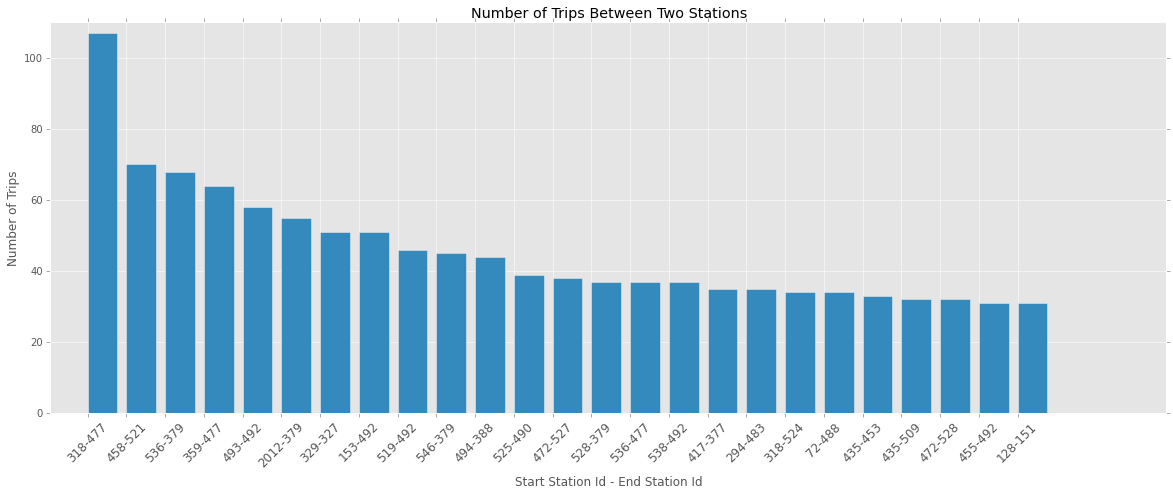

In [62]:
mpl.style.use('ggplot')
fig = plt.figure(figsize = (20, 7))
ax = plt.subplot(111)

x_plot = np.linspace(1, 26, 25)
ax.set_ylim(0, 110)
ax.set_ylabel("Number of Trips")
ax.set_xlabel("Start Station Id - End Station Id")
ax.set_title("Number of Trips Between Two Stations")
ax.bar(x_plot, dfAsorted['number of trips'][0:25])
ax.set_xticks(x_plot)
myplot = ax.set_xticklabels(nx, rotation=45, fontsize='large')

---
##Trip durations compared to the monthly median
---

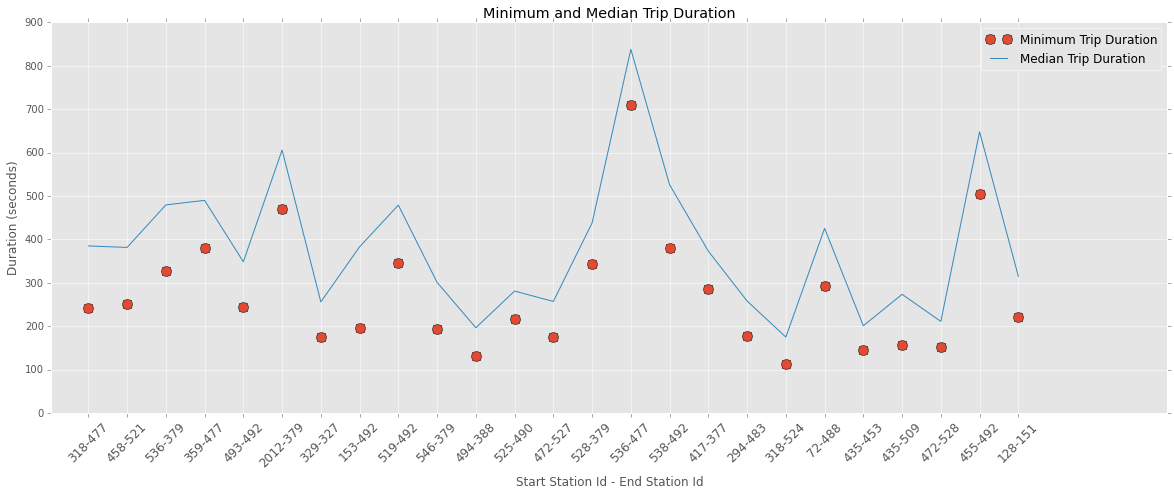

In [88]:
mpl.style.use('ggplot')
fig = plt.figure(figsize = (20, 7))
ax = plt.subplot(111)

x_plot = np.linspace(1, 26, 25)
ax.set_ylim(0, 900)
ax.set_ylabel("Duration (seconds)")
ax.set_xlabel("Start Station Id - End Station Id")
ax.set_title("Minimum and Median Trip Duration")
ax.plot(x_plot, dfAsorted['min duration'][0:25], 'o', markersize=10, label="Minimum Trip Duration")
ax.plot(x_plot, dfAsorted['medians'][0:25], '-', label="Median Trip Duration")

ax.set_xticks(x_plot)
ax.legend(loc='best')
myplot = ax.set_xticklabels(nx, rotation=45, fontsize='large')

In [205]:
dfsorted[0:5]

,start station id,end station id,number of trips,min duration,means
7226,318,477,107,241,394.766355
15996,458,521,70,251,393.900000
22741,536,379,68,328,512.602941
9988,359,477,64,381,505.093750
19007,493,492,58,244,361.362069


---
##Re-assign to a more memorable identifier
---

In [63]:
dfS1Jan = df

In [64]:
dfJan.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender,dayofweek,holidays,ninetofive
count,71616.000000,71616.000000,71616.000000,71616.000000,71616.000000,71616.000000,71616.000000,71616.000000,71616,71616,71616,71616
mean,674.931244,438.915564,40.736402,-73.989989,439.995392,40.736551,-73.990853,18001.722618,1,1,0,1
std,3065.992557,323.724689,0.019000,0.011658,325.775525,0.018758,0.011371,2004.455076,0,0,0,0
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1,True,False,True
25%,327.000000,307.000000,40.723180,-73.998004,307.000000,40.724055,-73.999061,16254.000000,1,1,0,1
50%,488.000000,411.000000,40.739323,-73.989978,412.000000,40.739445,-73.990765,17980.000000,1,1,0,1
75%,738.000000,490.000000,40.751396,-73.981780,492.000000,40.750664,-73.982912,19716.000000,1,1,0,1
max,495511.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21536.000000,1,True,False,True


---
##This has reduced the 71616 rows in the original dataset down to a mere 24290 rows
---

In [65]:
dfS1Jan.describe()

,start station id,end station id,number of trips,min duration,medians
count,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000
mean,439.506834,440.737876,2.906464,764.944874,831.639337
std,341.801998,346.834319,3.547931,4559.771905,4587.781853
min,72.000000,72.000000,1.000000,60.000000,62.000000
25%,303.000000,300.000000,1.000000,343.000000,405.000000
50%,398.000000,394.000000,2.000000,549.000000,610.500000
75%,485.000000,485.000000,3.000000,870.000000,927.000000
max,3002.000000,3002.000000,107.000000,495511.000000,495511.000000


---
##Sort the dataframe based upon the number of trips taken, we want the station pairs that have the most trips
---

In [66]:
dfS1JanSorted = dfS1Jan.sort(['number of trips'], ascending=False)

In [67]:
dfS1JanSorted = dfS1JanSorted.reset_index()

---
##The final dataframe contains station pairs for which a large number of trips have ocurred, and a record of the minimum times taken by the fatest riders
---

In [68]:
dfS1JanSorted.head()

,index,start station id,end station id,number of trips,min duration,medians
0,7226,318,477,107,241,385.0
1,15996,458,521,70,251,381.5
2,22741,536,379,68,328,479.5
3,9988,359,477,64,381,490.0
4,19007,493,492,58,244,348.5


---
##Now use this data frame to pull out the records from the raw data
##We want the full record of the trips between 2 stations that took the minimum duration of time, remembering that these are the most popular routes
##Let's limit it to having 1000 records per month
---

In [69]:
def process_top(df):
    dftemp = df[df['start station id'] != df['end station id']].copy()
    
    dfstemp = dftemp[['start station id', 'end station id', 'tripduration']]
    
    temp = dfstemp.groupby(['start station id', 'end station id'])
    
    counts = temp.count()
    counts.columns = ['number of trips']
    mins = temp.min()
    mins.columns = ['min duration']
    
    dfm = pd.merge(counts, mins, left_index=True, right_index=True)
    dfm = dfm.reset_index()
    
    dfmSorted = dfm.sort(['number of trips'], ascending=False)
    dfmSorted = dfmSorted.reset_index()
    
    #create a new dataframe of 1000 records
    nn = np.arange(0,1000)
    dfN = pd.DataFrame(columns = df.columns, index=nn)

    count = 0
    for i in xrange(1000):
        
        #get the trips that match the criterion, working our way through the sort dataframe
        temp = dfJan[(df['start station id'] == dfmSorted['start station id'][i]) & \
             (df['end station id'] == dfmSorted['end station id'][i]) & \
             (df['tripduration'] == dfmSorted['min duration'][i])]
        
        #this may return more than a single record
        #either way transfer the row across
        if len(temp) > 1:
            for j in xrange(len(temp)):
                dfN.loc[count] = temp.iloc[j].values
                count += 1
        else :
            try:
                dfN.loc[count] = temp.iloc[0].values
                count += 1
            except:
                print len(temp)
                print temp.values
        if count == 1000:
            break
    
    return dfN
    

In [70]:
dfN = process_top(dfJan)

In [71]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
tripduration               1000 non-null object
starttime                  1000 non-null object
stoptime                   1000 non-null object
start station id           1000 non-null object
start station name         1000 non-null object
start station latitude     1000 non-null object
start station longitude    1000 non-null object
end station id             1000 non-null object
end station name           1000 non-null object
end station latitude       1000 non-null object
end station longitude      1000 non-null object
bikeid                     1000 non-null object
usertype                   1000 non-null object
birth year                 1000 non-null object
gender                     1000 non-null object
dayofweek                  1000 non-null object
holidays                   1000 non-null object
ninetofive                 1000 non-null object
dtypes: object(18)
memory usag

In [86]:
dfDisplay = dfN[['start station id', 'end station id', 'tripduration', 'starttime', 'stoptime', \
                 'usertype', 'gender', 'dayofweek', 'holidays', 'ninetofive']]
dfDisplay[0:20]

,start station id,end station id,tripduration,starttime,stoptime,usertype,gender,dayofweek,holidays,ninetofive
0,318,477,241,2014-01-10 16:26:25,2014-01-10 16:30:26,Subscriber,1,True,False,True
1,458,521,251,2014-01-17 16:18:16,2014-01-17 16:22:27,Subscriber,1,True,False,True
2,536,379,328,2014-01-15 14:53:14,2014-01-15 14:58:42,Subscriber,1,True,False,True
3,359,477,381,2014-01-17 15:10:45,2014-01-17 15:17:06,Subscriber,1,True,False,True
4,493,492,244,2014-01-15 12:58:43,2014-01-15 13:02:47,Subscriber,1,True,False,True
5,2012,379,469,2014-01-02 14:23:43,2014-01-02 14:31:32,Subscriber,1,True,False,True
6,329,327,176,2014-01-15 16:12:15,2014-01-15 16:15:11,Subscriber,1,True,False,True
7,153,492,196,2014-01-15 12:06:45,2014-01-15 12:10:01,Subscriber,1,True,False,True
8,519,492,346,2014-01-17 13:39:11,2014-01-17 13:44:57,Subscriber,1,True,False,True
9,546,379,194,2014-01-17 16:12:09,2014-01-17 16:15:23,Subscriber,1,True,False,True
